In [17]:
import PyLidar3
import time
import math
import matplotlib.pyplot as plt

In [54]:
def draw(x, y):
    plt.figure(1)
    plt.cla()
    plt.ylim(-12000, 12000)
    plt.xlim(-12000, 12000)
    plt.scatter(x, y, c='r', s=8)
    plt.pause(0.001)

In [35]:
lidar.StopScanning()
lidar.Disconnect()

Lidar connected
{'model_number': '5', 'firmware_version': '2.33', 'hardware_version': '2', 'serial_number': '201909260'}
Current frequency is: 10.4


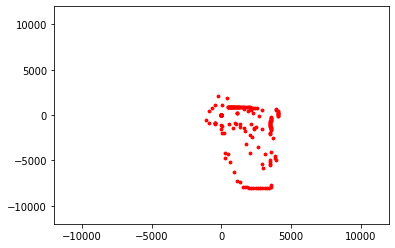

In [55]:
port = '/dev/ttyUSB1'  # the serial port for the lidar

# init
lidar = PyLidar3.YdLidarG4(port)
x, y = [], []
for _ in range(360):
    x.append(0)
    y.append(0)

try:
    if (lidar.Connect()):
        print('Lidar connected')
        print(lidar.GetDeviceInfo())
        print(f'Current frequency is: {lidar.GetCurrentFrequency()}')

        # begin testing
        gen = lidar.StartScanning()
        t = time.time() # start time 
        while (time.time() - t) < 10: #scan for 30 seconds
            data = next(gen)
            for angle in range(0, 360):
                if (data[angle] > 1000):
                    x[angle] = data[angle] * math.cos(math.radians(angle))
                    y[angle] = data[angle] * math.sin(math.radians(angle))
            time.sleep(0.5)
        draw(x, y)
        lidar.StopScanning()
        lidar.Disconnect()
        plt.close('all')
    else:
        print('Device not found')
except Exception as e:
    print('caught an exception:')
    print(e)
    lidar.StopScanning()
    lidar.Disconnect()